<a href="https://colab.research.google.com/github/sjunkim95/lab-python/blob/main/py24_yob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 미국 신생아 이름 데이터 셋

* https://github.com/wesm/pydata-book/tree/3rd-edition/datasets/babynames
* 1880년 ~ 2010년 연도별로 txt 파일이 만들어져 있음.
* 각 파일에는 '이름,성별,신생아수'가 comma(,)로 구분되어 있음.


In [2]:
file_path = 'https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/babynames/yob1880.txt'

In [3]:
yob1880 = pd.read_csv(file_path)

In [4]:
yob1880.head()

,Mary,F,7065
0,Anna,F,2604
1,Emma,F,2003
2,Elizabeth,F,1939
3,Minnie,F,1746
4,Margaret,F,1578


`pd.read_csv()` 함수는 파일의 첫번째 줄을 데이터프레임의 컬럼 이름으로 취급함(기본값).

CSV 파일에 컬럼 이름이 포함되어 있지 않은 경우(파일의 첫번째 줄부터 데이터가 시작되는 경우)에는 컬럼 이름들을 함수의 argument로 전달해야 함.


In [5]:
yob1880 = pd.read_csv(file_path, names=['name', 'gender', 'births'])

In [6]:
yob1880.head()

,name,gender,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [7]:
yob1880.tail()

,name,gender,births
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5
1999,Zachariah,M,5


각 TXT 파일을 읽어서 만들어진 연도별 데이터프레임들을 저장하는 리스트를 만드세요. (리스트의 길이는 131)

* 빈 리스트 변수 선언
* 1880 ~ 2010 반복
* 각 연도 파일을 읽어서 데이터프레임 생성
    * 각각의 데이터프레임에는 year 컬럼을 추가 -> 연도별 통계를 하기 위해서
* 데이터프레임을 리스트에 append


In [8]:
col_names = ['name', 'gender', 'births']  # 데이터프레임의 컬럼 이름들

In [9]:
yobs = []  # 데이터프레임들을 저장할 리스트
for year in range(1880, 2011):  # 1880 ~ 2010년까지 반복
    # txt 파일이 저장된 경로
    file_path = f'https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/babynames/yob{year}.txt'
    # 파일 읽어서 데이터프레임 생성
    df = pd.read_csv(file_path, names=col_names)
    # 데이터프레임에 year 컬럼을 추가 - 파생변수 추가
    df['year'] = year
    # 데이터프레임을 리스트에 추가
    yobs.append(df)

In [10]:
len(yobs)  # 2010 - 1880 + 1

131

In [11]:
yobs[0].head()  # 리스트의 각 원소는 데이터프레임.

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [12]:
yobs[0].tail()

,name,gender,births,year
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880
1999,Zachariah,M,5,1880


In [13]:
# 리스트의 마지막 원소 - 2010년 데이터프레임
yobs[-1].head()

,name,gender,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010


In [14]:
yobs[-1].tail()

,name,gender,births,year
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010
33837,Zzyzx,M,5,2010


리스트에 있는 131개의 데이터프레임을 하나의 데이터프레임으로 합침.

In [15]:
df = pd.concat(yobs, ignore_index=True)
# param ignore_index: 데이터프레임을 합칠 때 인덱스를 무시할 지 말 지를 설정. 기본값은 False.

In [16]:
df.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [17]:
df.tail()

,name,gender,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [19]:
df.loc[0] # (비교, 주의) iloc[0] 다른 결과. iloc 은 정수 인덱스 그 한 줄만 보여준다.

name      Mary
gender       F
births    7065
year      1880
Name: 0, dtype: object

In [20]:
df = pd.concat(yobs, ignore_index=True)
# param ignore_index: 데이터프레임을 합칠 때 인덱스를 무시할 지 말 지를 설정. 기본값은 False (즉, 무시하지 않겠다) -> 기본값은 유지하겠다라는 것.

In [21]:
df.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [22]:
df.tail()

,name,gender,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [23]:
df.loc[0] # (비교, 주의) iloc[0] 다른결과

name      Mary
gender       F
births    7065
year      1880
Name: 0, dtype: object

## 연도별 신생아 수, 시각화

In [24]:
births_by_year = df.groupby('year').births.sum()
births_by_year

year
1880     201486
1881     192703
1882     221538
1883     216954
1884     243466
         ...   
2006    3946702
2007    3986130
2008    3915955
2009    3801002
2010    3657392
Name: births, Length: 131, dtype: int64

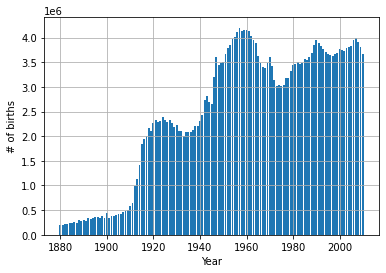

In [25]:
plt.bar(x=births_by_year.index, height=births_by_year.values)
plt.grid()
plt.xlabel('Year')
plt.ylabel('# of births')
plt.show()
# 밑의 그래프에 1e6이라는 것은, 10^6. 즉, 제일 많은 출산은 10^6 * 4 가 넘는 해도 있는 것.

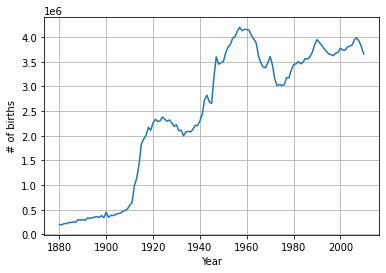

In [26]:
plt.plot(births_by_year.index, births_by_year.values)
plt.grid()
plt.xlabel('Year')
plt.ylabel('# of births')
plt.show()

## 연도별 성별 신생아 수, 시각화

In [27]:
births_by_year_gender = df.groupby(['year', 'gender']).births.sum()
births_by_year_gender #> multi-level 인덱스를 갖는 series

year  gender
1880  F           90993
      M          110493
1881  F           91955
      M          100748
1882  F          107851
                 ...   
2008  M         2032310
2009  F         1827643
      M         1973359
2010  F         1759010
      M         1898382
Name: births, Length: 262, dtype: int64

In [28]:
# multi-level 인덱스를 데이터프레임의 컬럼으로 변환
births_df = births_by_year_gender.reset_index()

In [29]:
births_df.head()

,year,gender,births
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851


In [30]:
births_female = births_df[births_df.gender == 'F'] # 여자 신생아
births_male = births_df[births_df.gender == 'M'] # 남자 신생아

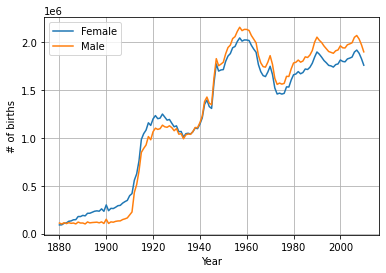

In [31]:
plt.plot(births_female.year, births_female.births, label='Female')
plt.plot(births_male.year, births_male.births, label='Male')

plt.legend()
plt.grid()
plt.xlabel('Year')
plt.ylabel('# of births')
plt.show()

In [32]:
df.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


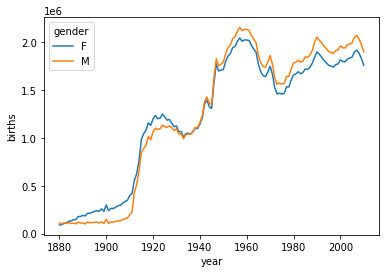

In [33]:
sns.lineplot(data=df, x='year', y='births', hue='gender',
            estimator=np.sum, err_style=None)
plt.show()